## Assignment 7.2
Author: Rex Gayas
Date: 28 January 2024
Modified By: N/A
Description: Using data wrangling techniques and visualization tools to analyze and depict stock price fluctuations and earthquake data trends.

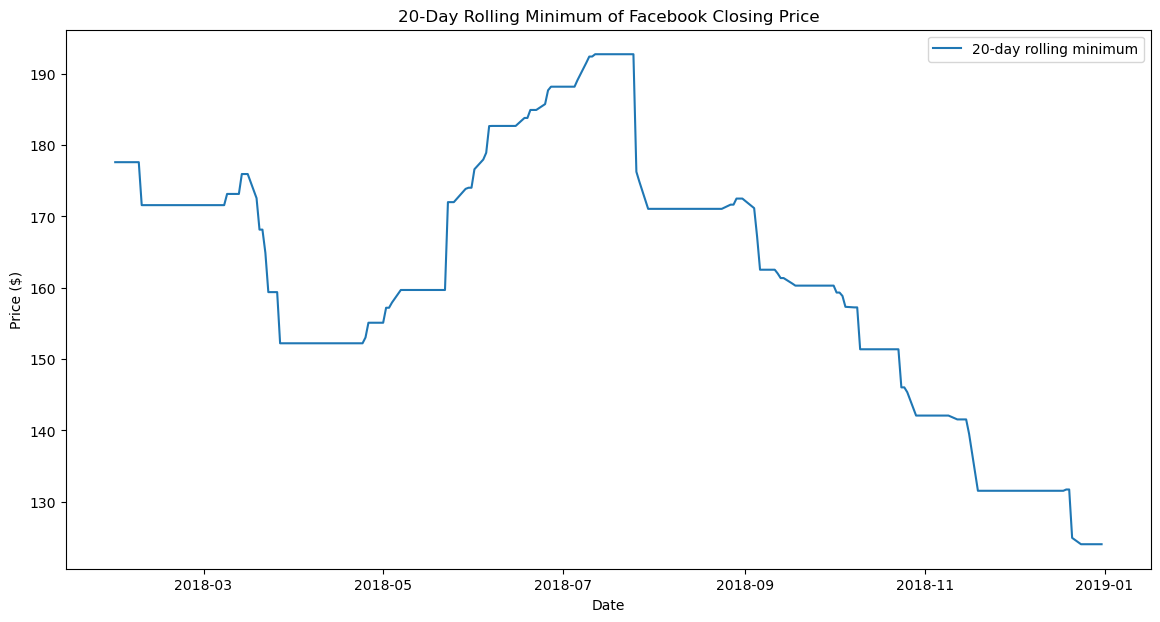

In [20]:
# Solution to (1)
import pandas as pd
import matplotlib.pyplot as plt

# File Path for Facebook stock prices data
fb_stock_path = "D:\\ALPHA\\Dynamic Folder\\Bellevue\\Winter 2023\\Data Wrangling\\Week 7\\fb_stock_prices_2018.csv"

# Load the Facebook stock prices data
fb_data = pd.read_csv(fb_stock_path)

# Check that 'date' column is a datetime type
fb_data['date'] = pd.to_datetime(fb_data['date'])

# Set the 'date' column as the index of the dataframe
fb_data.set_index('date', inplace=True)

# Calculate the 20-day rolling minimum of the closing prices
fb_data['20_day_min'] = fb_data['close'].rolling(window=20).min()

# Plot the rolling minimum
plt.figure(figsize=(14, 7))
plt.plot(fb_data.index, fb_data['20_day_min'], label='20-day rolling minimum')
plt.title('20-Day Rolling Minimum of Facebook Closing Price')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


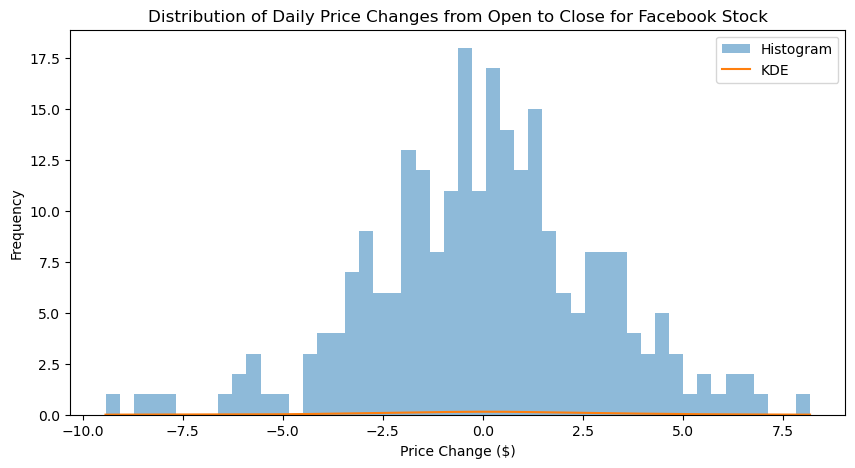

In [21]:
# Solution to (2)
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np 

# Load the Facebook stock prices data
fb_data = pd.read_csv('D:\\ALPHA\\Dynamic Folder\\Bellevue\\Winter 2023\\Data Wrangling\\Week 7\\fb_stock_prices_2018.csv')

# Calculate the change from open to close
fb_data['change'] = fb_data['close'] - fb_data['open']

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.hist(fb_data['change'], bins=50, alpha=0.5, label='Histogram')

# Calculate the KDE using scipy
change_density = gaussian_kde(fb_data['change'])
change_vals = np.linspace(fb_data['change'].min(), fb_data['change'].max(), 1000)
plt.plot(change_vals, change_density(change_vals), label='KDE')

# Include titles and labels
plt.title('Distribution of Daily Price Changes from Open to Close for Facebook Stock')
plt.xlabel('Price Change ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


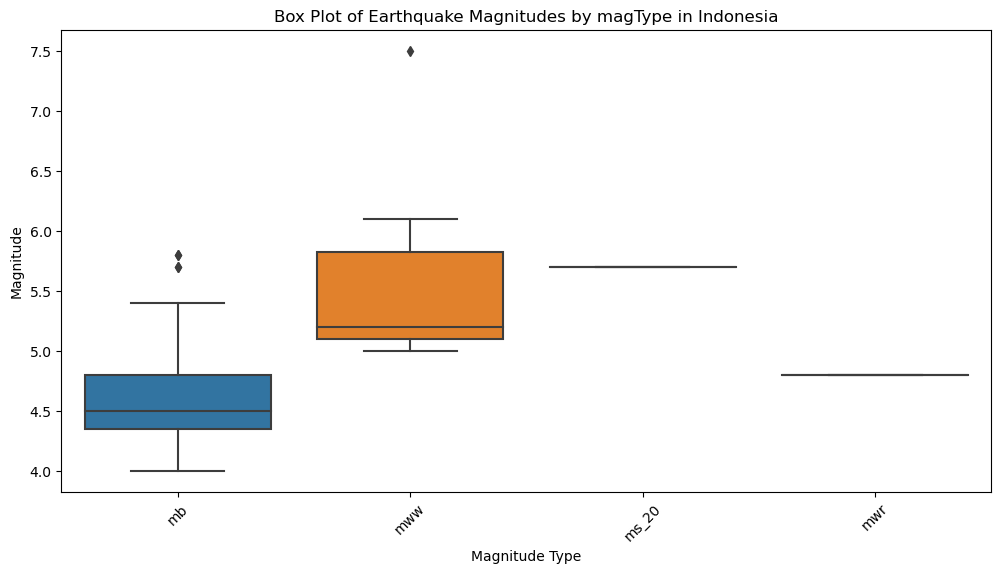

In [22]:
# Solution to (3)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the earthquake data
earthquake_data = pd.read_csv('D:\\ALPHA\\Dynamic Folder\\Bellevue\\Winter 2023\\Data Wrangling\\Week 7\\earthquakes.csv')

# Filter the data for earthquakes in Indonesia
indonesia_earthquakes = earthquake_data[earthquake_data['place'].str.contains('Indonesia')]

# Group the data by 'magType' and plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='magType', y='mag', data=indonesia_earthquakes)

# Include titles and labels
plt.title('Box Plot of Earthquake Magnitudes by magType in Indonesia')
plt.xlabel('Magnitude Type')
plt.ylabel('Magnitude')
plt.xticks(rotation=45)  
plt.show()


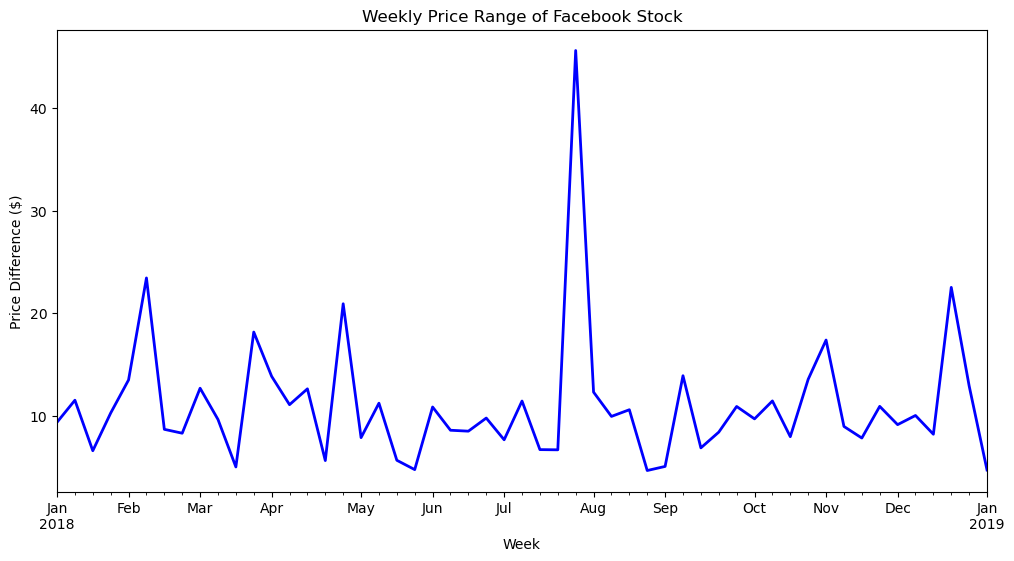

In [23]:
# Solution to (4)
import pandas as pd
import matplotlib.pyplot as plt

# Load the Facebook stock prices data
fb_stock_path = "D:\\ALPHA\\Dynamic Folder\\Bellevue\\Winter 2023\\Data Wrangling\\Week 7\\fb_stock_prices_2018.csv"
fb_data = pd.read_csv(fb_stock_path)

# Convert the date column to datetime and set as the DataFrame index
fb_data['date'] = pd.to_datetime(fb_data['date'])
fb_data.set_index('date', inplace=True)

# Resample to get weekly maximum high and minimum low prices
weekly_max_high = fb_data['high'].resample('W').max()
weekly_min_low = fb_data['low'].resample('W').min()

# Calculate the difference between the weekly maximum high and minimum low prices
weekly_price_diff = weekly_max_high - weekly_min_low

# Plot the difference
plt.figure(figsize=(12, 6))
weekly_price_diff.plot(title='Weekly Price Range of Facebook Stock', color='blue', linestyle='-', linewidth=2)
plt.xlabel('Week')
plt.ylabel('Price Difference ($)')
plt.show()


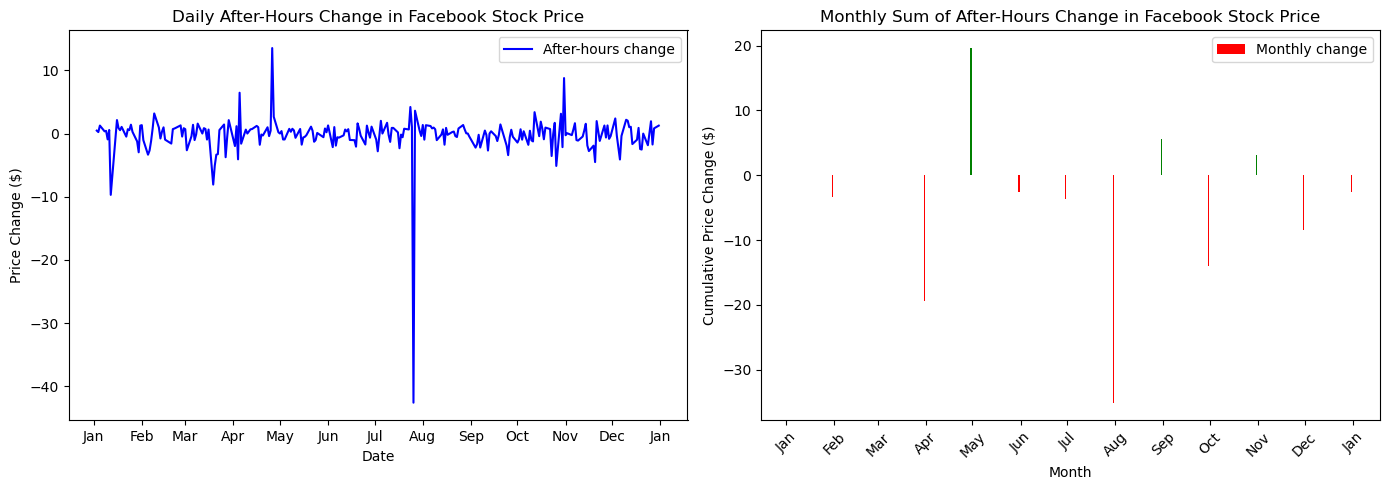

In [24]:
# Solution to (6)
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the Facebook stock prices data
fb_data = pd.read_csv('D:\\ALPHA\\Dynamic Folder\\Bellevue\\Winter 2023\\Data Wrangling\\Week 7\\fb_stock_prices_2018.csv')

# Convert the date column to datetime and set as the DataFrame index
fb_data['date'] = pd.to_datetime(fb_data['date'])
fb_data.set_index('date', inplace=True)

# Create a column for the previous day's closing price
fb_data['prev_close'] = fb_data['close'].shift(1)

# Calculate the after-hours trading effect
fb_data['after_hours_change'] = fb_data['open'] - fb_data['prev_close']

# Monthly sum of after-hours changes
monthly_change = fb_data['after_hours_change'].resample('M').sum()

# Prepare matplotlib figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

# Plot the daily after-hours changes
axes[0].plot(fb_data.index, fb_data['after_hours_change'], label='After-hours change', color='blue')
axes[0].set_title('Daily After-Hours Change in Facebook Stock Price')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price Change ($)')

# Plot the monthly sums of after-hours changes
axes[1].bar(monthly_change.index, monthly_change, 
            color=['green' if x > 0 else 'red' for x in monthly_change], label='Monthly change')
axes[1].set_title('Monthly Sum of After-Hours Change in Facebook Stock Price')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Cumulative Price Change ($)')

# Set x-axis to show month abbreviations
axes[1].xaxis.set_major_locator(mdates.MonthLocator())
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Rotate the x-axis labels for better view
plt.setp(axes[1].get_xticklabels(), rotation=45)

# Show legend
axes[0].legend()
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
